# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
batch_size = 10
start_city = 10
weather_data = []

for city in cities[start_city:(start_city+batch_size)]:
    print(city)

    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        weather_data.append(weather_json)
    

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")
len(weather_data)

ushuaia
rikitea
mys shmidta
upernavik
cidreira
babanusah
atuona
tecolutla
sestri levante
tsagan aman


8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#City          550
#Lat           550
#Lng           550
#Max Temp      550
#Humidity      550
#Cloudiness    550
#Wind Speed    550
#Country       550
#Date          550
df_cities = pd.DataFrame()
for one_city in weather_data:
    print(one_city["name"])
    row = {
        "City": one_city["name"],
        "Lat":  one_city["coord"]["lat"],
        "Lon":  one_city["coord"]["lon"],
        "Max Temp": one_city["main"]["temp_max"],
        "Humidity": one_city["main"]["humidity"],
        "Cloudiness": one_city["clouds"]["all"],
        "Wind Speed": one_city["wind"]["speed"],
        "Country": one_city["sys"]["country"],
        "Date": one_city["dt"]
    }
    df_cities = df_cities.append(row, ignore_index=True)
df_cities.to_csv("weather_dataframe.csv")

Ushuaia
Rikitea
Upernavik
Cidreira
Atuona
Tecolutla
Sestri Levante
Tsagan Aman


In [5]:
df_cities

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Ushuaia,75.0,AR,1.587102e+09,71.0,-54.80,-68.30,285.15,9.80
1,Rikitea,3.0,PF,1.587101e+09,75.0,-23.12,-134.97,297.78,4.35
2,Upernavik,100.0,GL,1.587102e+09,92.0,72.79,-56.15,269.24,4.90
3,Cidreira,19.0,BR,1.587102e+09,80.0,-30.18,-50.21,290.92,4.83
4,Atuona,75.0,PF,1.587102e+09,76.0,-9.80,-139.03,301.30,6.07
5,Tecolutla,76.0,MX,1.587102e+09,90.0,20.48,-97.02,296.65,1.60
6,Sestri Levante,20.0,IT,1.587102e+09,57.0,44.27,9.40,284.82,1.00
7,Tsagan Aman,49.0,RU,1.587102e+09,54.0,47.56,46.72,284.06,11.67


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
df_cities.describe()

,Cloudiness,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
count,8.000000,8.000000e+00,8.000000,8.000000,8.00000,8.000000,8.000000
mean,52.125000,1.587102e+09,74.375000,8.400000,-61.19500,288.740000,5.527500
std,34.766312,6.255840e+01,13.721073,44.592709,65.03886,10.262293,3.673635
min,3.000000,1.587101e+09,54.000000,-54.800000,-139.03000,269.240000,1.000000
25%,19.750000,1.587102e+09,67.500000,-24.885000,-106.50750,284.630000,3.662500
50%,62.000000,1.587102e+09,75.500000,5.340000,-62.22500,288.035000,4.865000
75%,75.250000,1.587102e+09,82.500000,45.092500,-35.30750,296.932500,7.002500
max,100.000000,1.587102e+09,92.000000,72.790000,46.72000,301.300000,11.670000


In [7]:
#  Get the indices of cities that have humidity over 100%.
df_cities[df_cities["Humidity"] > 100.0]

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df_clean_cities = df_cities.drop(df_cities[df_cities["Humidity"] > 100.0].index)

In [9]:
# Extract relevant fields from the data frame
df_clean_cities = df_clean_cities[["Lat", "Cloudiness", "Humidity", "Max Temp", "Wind Speed"]]

# Export the City_Data into a csv
df_clean_cities.to_csv("weather_clean_dataframe.csv")
df_clean_cities

,Lat,Cloudiness,Humidity,Max Temp,Wind Speed
0,-54.80,75.0,71.0,285.15,9.80
1,-23.12,3.0,75.0,297.78,4.35
2,72.79,100.0,92.0,269.24,4.90
3,-30.18,19.0,80.0,290.92,4.83
4,-9.80,75.0,76.0,301.30,6.07
5,20.48,76.0,90.0,296.65,1.60
6,44.27,20.0,57.0,284.82,1.00
7,47.56,49.0,54.0,284.06,11.67


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

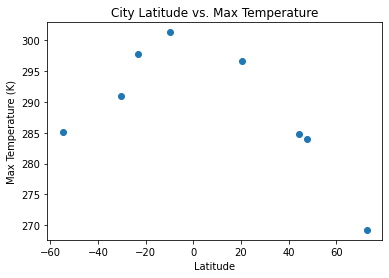

In [10]:
plt.title("City Latitude vs. Max Temperature")
plt.scatter(df_clean_cities["Lat"], df_clean_cities["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.show()

## Latitude vs. Humidity Plot

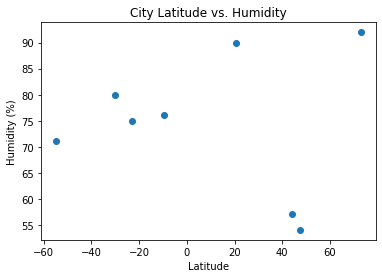

In [11]:
plt.title("City Latitude vs. Humidity")
plt.scatter(df_clean_cities["Lat"], df_clean_cities["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

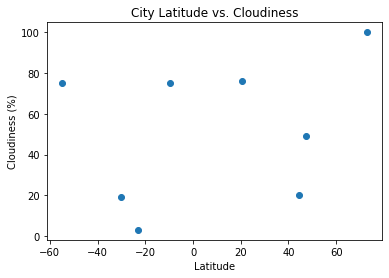

In [12]:
plt.title("City Latitude vs. Cloudiness")
plt.scatter(df_clean_cities["Lat"], df_clean_cities["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

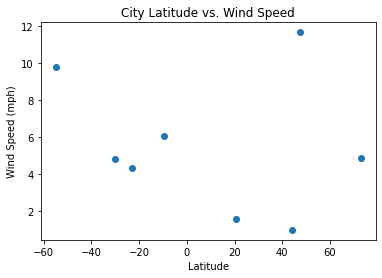

In [13]:
plt.title("City Latitude vs. Wind Speed")
plt.scatter(df_clean_cities["Lat"], df_clean_cities["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def fit_plot(x, y, field, units):
    ann_x = x.min() + (x.max() - x.min())*0.3
    ann_y = y.min() + (y.max() - y.min())*0.1
    ann_r = y.min() + (y.max() - y.min())*0.2
    lreg = linregress(x, y)
    plt.title(f"City Latitude vs. {field}")
    plt.scatter(x, y, label="Original data")
    plt.plot(x, lreg.slope*x + lreg.intercept, color="red", label="Fitted line")
    plt.annotate(f"y = {lreg.slope:.2f} x Lat + {lreg.intercept:.2f}", xy=(ann_x,ann_y), color="red")
    plt.annotate(f"r-squared: {lreg.rvalue**2:.3f}", xy=(ann_x,ann_r), color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{field} ({units})")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
df_northern = df_clean_cities[df_clean_cities["Lat"] >= 0]
df_southern = df_clean_cities[df_clean_cities["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

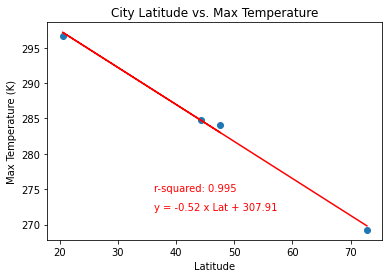

In [16]:
fit_plot(df_northern["Lat"], df_northern["Max Temp"], "Max Temperature", "K")

In [17]:
mi = df_clean_cities["Lat"].min()
ma = df_clean_cities["Lat"].max()
mi + (ma - mi)*0.1

-42.041

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

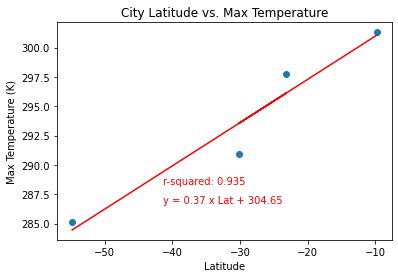

In [18]:
fit_plot(df_southern["Lat"], df_southern["Max Temp"], "Max Temperature", "K")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

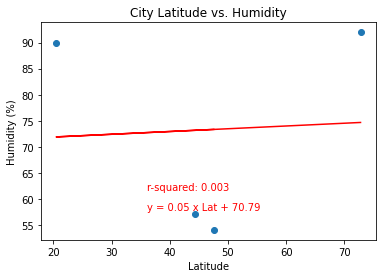

In [19]:
fit_plot(df_northern["Lat"], df_northern["Humidity"], "Humidity", "%")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

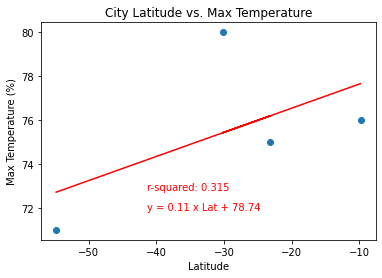

In [20]:
fit_plot(df_southern["Lat"], df_southern["Humidity"], "Max Temperature", "%")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

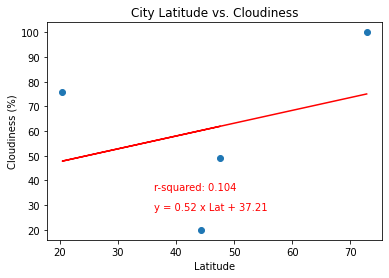

In [21]:
fit_plot(df_northern["Lat"], df_northern["Cloudiness"], "Cloudiness", "%")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

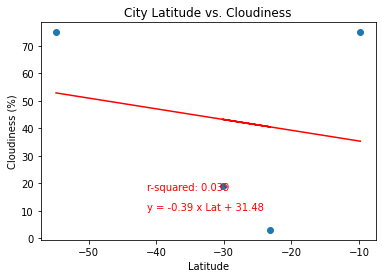

In [22]:
fit_plot(df_southern["Lat"], df_southern["Cloudiness"], "Cloudiness", "%")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

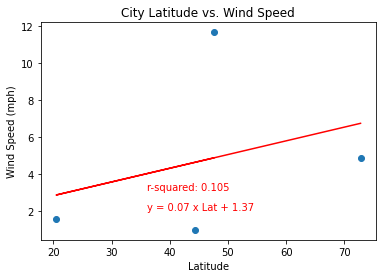

In [23]:
fit_plot(df_northern["Lat"], df_northern["Wind Speed"], "Wind Speed", "mph")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

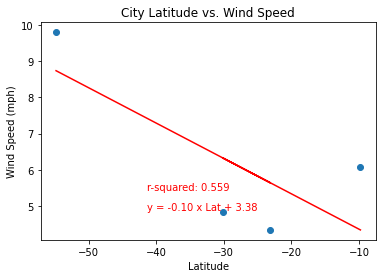

In [24]:
fit_plot(df_southern["Lat"], df_southern["Wind Speed"], "Wind Speed", "mph")